In [1]:
import argparse
import os

from utils.utils import *
from scripts.config import DefaultArgsNamespace
import torch
import torch.nn as nn
import torchvision.models as models
from datautils.ems import *
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR
import wandb
from datetime import datetime

import cv2

from PIL import Image

import matplotlib.pyplot as plt

import argparse
import warnings
warnings.filterwarnings("ignore", message="Accurate seek is not implemented for pyav backend")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [2]:
# get cmd line args
args = DefaultArgsNamespace()

keysteps = args.dataloader_params['keysteps']
out_classes = len(keysteps)

modality = args.dataloader_params['modality']
print("Modality: ", modality)
print("Num of classes: ", out_classes)

window = args.dataloader_params['observation_window']
print("Window: ", window)

task = args.dataloader_params['task']
print("Task: ", task)


# train_loader, val_loader, test_loader = get_dataloaders(args)
train_loader, val_loader, test_loader, train_class_stats, val_class_stats = eee_get_dataloaders(args)
args.dataloader_params['train_class_stats'] = train_class_stats
args.dataloader_params['val_class_stats'] = val_class_stats

Modality:  ['video', 'smartwatch', 'depth_sensor']
Num of classes:  35
Window:  150
Task:  cpr_quality
********** ========== **********
Loading dataloader for CPR quality task
[Warning] Skipping trial 6 for subject ms1 due to missing data
[Warning] Skipping trial 7 for subject ms1 due to missing data
[Warning] Skipping trial 8 for subject ms1 due to missing data
[Warning] Skipping trial 3 for subject wa1 due to missing data
[Warning] Skipping trial 0 for subject wa1 due to missing data
[Warning] Skipping trial 1 for subject wa4 due to missing data
Splitting data to windows
Class stats: {'chest_compressions': 347}
Total windowed clips: 386
Splitting data to windows
Class stats: {'chest_compressions': 223}
Total windowed clips: 235
[Warning] Skipping trial 2 for subject wa1 due to missing data
[Warning] Skipping trial 1 for subject wa1 due to missing data
[Warning] Skipping trial 0 for subject wa2 due to missing data
[Warning] Skipping trial 0 for subject wa4 due to missing data
[Warning

loading video from 13.780447113780447 to 18.785452118785454 from file /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/5/GoPro/GX010361_encoded_trimmed.mp4
****************
Batch:  0
Special case for CPR quality task
Subject:  [['ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 'ng8', 

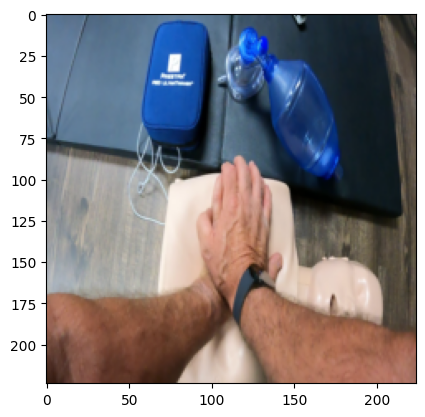

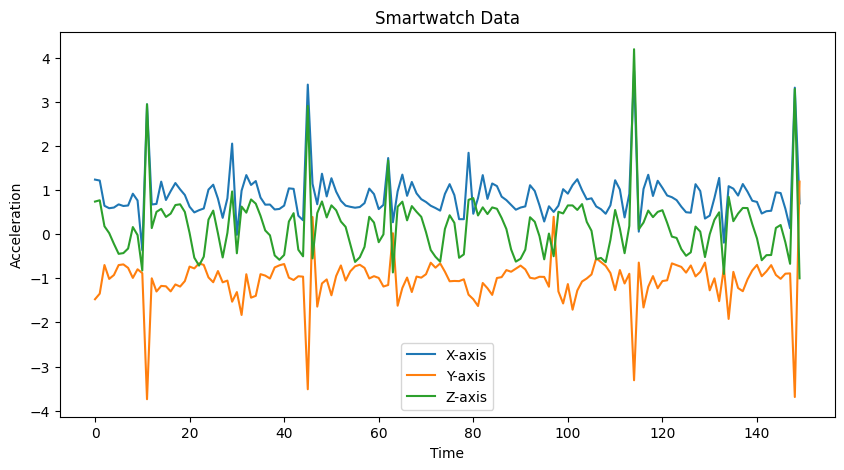

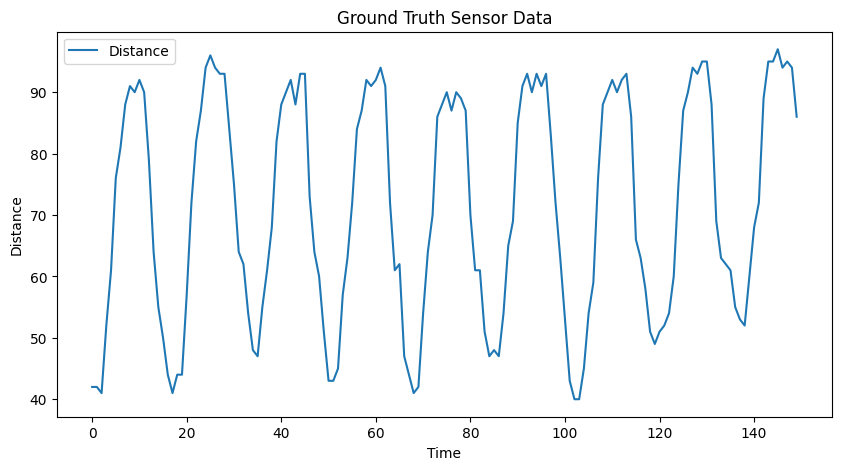

****************


In [12]:
for i, batch in enumerate(train_loader):
    print("****************")
    print("Batch: ", i)
    input,feature_size, gt_sensor_data = preprocess(batch, modality, None, device, task=task)
    print("Subject: ", batch['subject_id'])
    print("Trial", batch['trial_id'])
    print("Input frames: ", input['frames'].shape)
    
    # sample image
    image = input['frames'][0][0].permute(1,2,0).cpu().numpy()
    # convert to PIL image
    image = Image.fromarray(image)
    # show pil image
    plt.imshow(image)
    
    print("Input smartwatch: ", input['smartwatch'].shape)
    print("gt_sensor_data shape: ", gt_sensor_data.shape)
    
    # plot the smartwatch data (3-axis accelerometer)
    smartwatch_data = input['smartwatch'][0].cpu().numpy()
    plt.figure(figsize=(10, 5))
    plt.plot(smartwatch_data[:, 0], label='X-axis')
    plt.plot(smartwatch_data[:, 1], label='Y-axis')
    plt.plot(smartwatch_data[:, 2], label='Z-axis')
    plt.title('Smartwatch Data')
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.show()
    
    # plot the gt_sensor_data (1-axis distance)
    gt_sensor_data = gt_sensor_data[0].cpu().numpy()
    plt.figure(figsize=(10, 5))
    plt.plot(gt_sensor_data, label='Distance')
    plt.title('Ground Truth Sensor Data')
    plt.xlabel('Time')
    plt.ylabel('Distance')
    plt.legend()
    plt.show()
    print("****************")
    
    break
    